# PHYS 105A:  Introduction to Scientific Computing

## Data Processing with Python


## Using numerical and data science packages

* This lecture is about statsistics, which means that we need to handle (relatively) large data sets.

* While we have learned how to read in text files, handle lists, etc in pure python, it's useful to get some help!

* At the end, python is so popular in Data Scinece because of all the packages the python community develop!

* We will learn the basic of three packages: `numpy`, `pandas`, and `scipy`

## `numpy`

* We will start with the `numpy` package.

* `numpy` enables array programming in python.  I.e., it enables us to work on a whole array of objects (numbers) "in one go" in python.

* The backend functionality in `numpy` are written in C, making it very high performance.

* The array programming model also provide a natural way to perform handle functions on arrays.

* `numpy` is the core package that enables scientific computation in python.

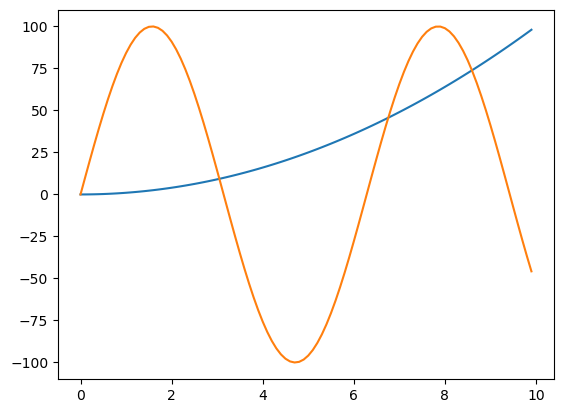

In [1]:
from matplotlib import pyplot as plt
from math import sin, pi

# for every item i in list [0,1,2,...,98,99] put 0.1*i in the list
X = [0.1 * i for i in range(100)]

# for every item x in list X put x*x in the list
F = [x * x for x in X]

# for every item x in list X put 100*sin(x) in the list
G = [100 * sin(x) for x in X]
# print(X)
# print(F)
plt.plot(X, F) # X and F are two lists with the same number of elements
plt.plot(X, G) # the number of elements is determined by the list X

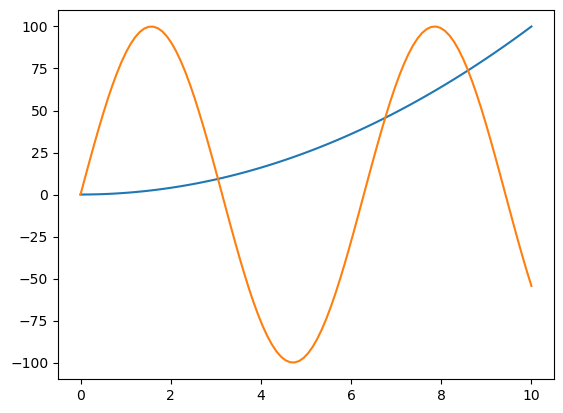

In [2]:
import numpy as np # load package numpy and rename it to np

X = np.linspace(0, 10, num=100) # google "numpy.linspace" see what it does
F = X * X # multiplication element-wise
G = 100 * np.sin(X) # calculate sin for every element in X then * 100
# print(X)
# print(F)
plt.plot(X, F) # same as above
plt.plot(X, G) # same as above

In [3]:
# X has a "data type"

print(X.dtype) # type of data elements in the array
print(type(X)) # type of the array

# All the values in a numpy array is densely packed as a C array.
# Instead of a list of python object.
# Numpy array always has a shape, which is a tuple of positive integers.
# In 1D, the shape is the same as len()

print(X.shape) # X.shape is still a tuple
print(len(X)) # but len(X) is a number

# But in 2D, they are different

Y = np.array([[1,2,3], [4,5,6]]) # definition of a 2D array, see what it looks like when printout

print(Y)
print(Y.shape)
print(len(Y))

float64
<class 'numpy.ndarray'>
(100,)
100
[[1 2 3]
 [4 5 6]]
(2, 3)
2


In [4]:
# Numpy arrays, by default, operate in an "element-wise" way.

print(Y + 2)
print(Y * 2)
print(Y * Y)

# There is a large number of functions that also work in the "element-wise" fasion.

print(np.sin(Y))
print(np.cos(Y))
print(Y ** 3)

# if all quantity in an equation is either numpy array or number it'll be element-wise

[[3 4 5]
 [6 7 8]]
[[ 2  4  6]
 [ 8 10 12]]
[[ 1  4  9]
 [16 25 36]]
[[ 0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155 ]]
[[ 0.54030231 -0.41614684 -0.9899925 ]
 [-0.65364362  0.28366219  0.96017029]]
[[  1   8  27]
 [ 64 125 216]]


## `pandas`

* While numpy is the core of scientific computation in python, sometimes a large data set contains more information than a plain array.

* For example, when you look at an excel spreadsheet, very often each column contains a different physical quality carrying different meaning and even unit (time, income, output).  Saying a spreadsheet is a 2D-array calculator is not totally fair.

* The `pandas` package allows us to add that structure, and physical meaning, to different columns of a table.

* `pandas` is one of the main package that makes data science work in python!

In [5]:
import pandas as pd

# The most useful data structure of pandas is a DataFrame, which is more or less a table of 2D array.
df = pd.DataFrame([[1,2,3], [4,5,6]])
display(df)

# The difference is that you can assign meaning to different columns, such as index and column name
df = pd.DataFrame([[1,2,3], [4,5,6]], columns=['a', 'b', 'c'])
display(df)

# Now it is possible to access the diffrent columns by name
print(df['a']) # access by key
print(df.b)    # access by attribute

,0,1,2
0,1,2,3
1,4,5,6


,a,b,c
0,1,2,3
1,4,5,6


0    1
1    4
Name: a, dtype: int64
0    2
1    5
Name: b, dtype: int64


In [6]:
# It is easy to create a new columns in pandas DataFrame

df['sum']  =  df.a + df.b + df.c
df['mean'] = (df.a + df.b + df.c) / 3

# Note that each column acts as a numpy array, that we can perform "element-wise" operations

display(df)

# We may also see a pandas DataFrame as a database.
# Then it makes sense to "drop" information...

df = df.drop(['sum', 'mean'], axis =1)

display(df)

,a,b,c,sum,mean
0,1,2,3,6,2.0
1,4,5,6,15,5.0


,a,b,c
0,1,2,3
1,4,5,6


In [7]:
# Since DataFrame is like a database, we may use pandas to perform some operation "per row" for us.

display(df.apply(np.sum, axis=1))

# We can of course add the resulting column back to the DataFrame

df['mean'] = df.apply(np.mean, axis=1)
display(df)

0     6
1    15
dtype: int64

,a,b,c,mean
0,1,2,3,2.0
1,4,5,6,5.0


In [8]:
# It is actually possible to run shell command in Jupyter notebook.
# We simply start with a "!".
# Let's first look at what files we have in this directory:

!ls

# We would like to load the "temperature.csv" file.
# Let's use the Unix command `head` to show what is in it:

!head -10 temperature.csv

# This file actually contains the world temperature as function of time for the last ~ 150 years!

GlobalTemperatures.csv dataproc.ipynb
assignment.ipynb       temperature.csv


date,temperature,uncertainty
1850-01-01,1.2833e+01,3.67e-01
1850-02-01,1.3588e+01,4.14e-01
1850-03-01,1.4043e+01,3.41e-01
1850-04-01,1.4667e+01,2.67e-01
1850-05-01,1.5507e+01,2.49e-01
1850-06-01,1.6353e+01,2.45e-01
1850-07-01,1.6783e+01,2.38e-01
1850-08-01,1.6718e+01,2.80e-01
1850-09-01,1.5886e+01,2.54e-01


In [9]:
# Let's load this file using pandas:

df = pd.read_csv('temperature.csv')

# That's it!  No file opening, no for loop!

display(df)

,date,temperature,uncertainty
0,1850-01-01,12.833,0.367
1,1850-02-01,13.588,0.414
2,1850-03-01,14.043,0.341
3,1850-04-01,14.667,0.267
4,1850-05-01,15.507,0.249
...,...,...,...
1987,2015-08-01,17.589,0.057
1988,2015-09-01,17.049,0.058
1989,2015-10-01,16.290,0.062
1990,2015-11-01,15.252,0.063


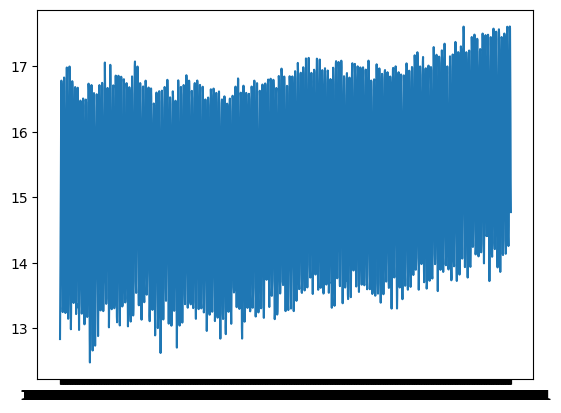

In [10]:
# We may now plot the data set.
# The plot will take some time.  What's going on?

plt.plot(df.date, df.temperature)

In [11]:
# It turns out that the the "date" column is still in string!
# And matplotlib is slow in figure out the labels of the x-axis.

df.date

0       1850-01-01
1       1850-02-01
2       1850-03-01
3       1850-04-01
4       1850-05-01
           ...    
1987    2015-08-01
1988    2015-09-01
1989    2015-10-01
1990    2015-11-01
1991    2015-12-01
Name: date, Length: 1992, dtype: object

In [12]:
# Fortuantely, pandas has a "datetime" type that can help us fix it.

df.date = pd.to_datetime(df.date)
df.date

0      1850-01-01
1      1850-02-01
2      1850-03-01
3      1850-04-01
4      1850-05-01
          ...    
1987   2015-08-01
1988   2015-09-01
1989   2015-10-01
1990   2015-11-01
1991   2015-12-01
Name: date, Length: 1992, dtype: datetime64[ns]

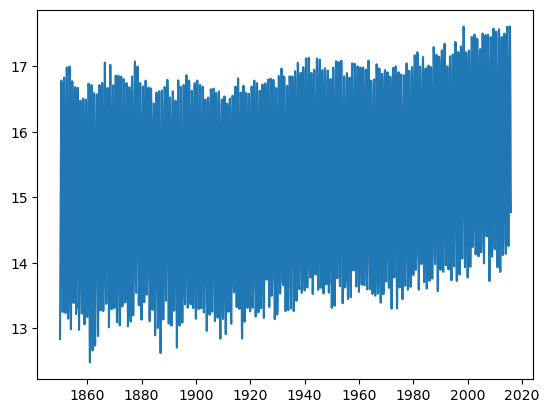

In [13]:
# Now plotting should take less than a second!
# Data type is important!

plt.plot(df.date, df.temperature)

(10957.0, 14610.0)

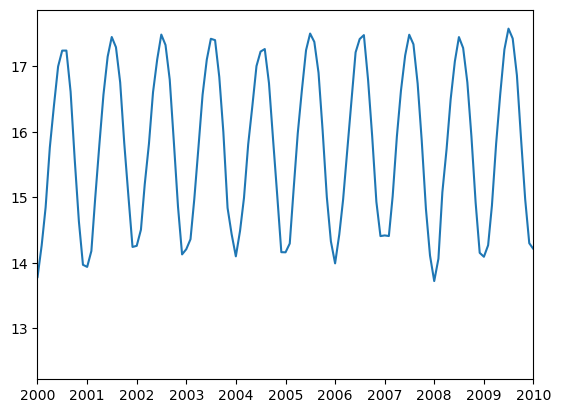

In [14]:
# There are too many data points, let's zoom into the data

plt.plot(df.date, df.temperature)
plt.xlim(pd.to_datetime('2000'), pd.to_datetime('2010'))

# What are these waves?

,date,temperature,uncertainty
date,,,
1,1932-07-02 07:22:24.578313216,13.458054,0.140849
2,1932-08-02 07:22:24.578313216,13.722807,0.139765
3,1932-08-30 13:09:23.855421696,14.339988,0.129904
4,1932-09-30 13:09:23.855421696,15.215886,0.127337
5,1932-10-30 13:09:23.855421696,15.996398,0.128349
6,1932-11-30 13:09:23.855421696,16.597602,0.122976
7,1932-12-30 13:09:23.855421696,16.902639,0.126861
8,1933-01-30 13:09:23.855421696,16.809410,0.128367
9,1933-03-02 13:09:23.855421696,16.212114,0.122139


Text(0.5, 1.0, 'Seasonal changes')

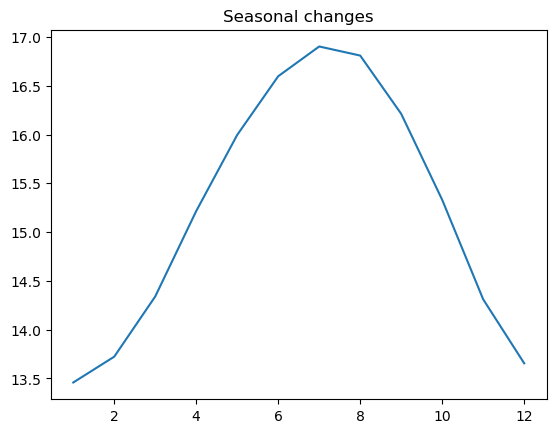

In [15]:
# Looking at the period, these look like seasonal variations.
# pandas provide tools for us to group the data and then perform group operation.

mm = df.groupby(by=[df.date.dt.month]).mean()

display(mm)

plt.plot(mm.index, mm.temperature)
plt.title('Seasonal changes')

## Use `scipy` to fit curves

* Another very common progress we need to do it to fit curves to data.

* `scipy` provides standard [curve fitting](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) functions that we can use.

In [16]:
from scipy.optimize import curve_fit

# Provide a functional form to fit
def func(t, off, amp, phi):
    return off + amp * np.sin(2 * pi * (t - phi) / 12)

popt, pcov = curve_fit(func, mm.index, mm.temperature)

# This contains the fitted parameters
print(popt)

[15.21256576  1.74182653  4.06357895]


Text(0.5, 1.0, 'Seasonal changes')

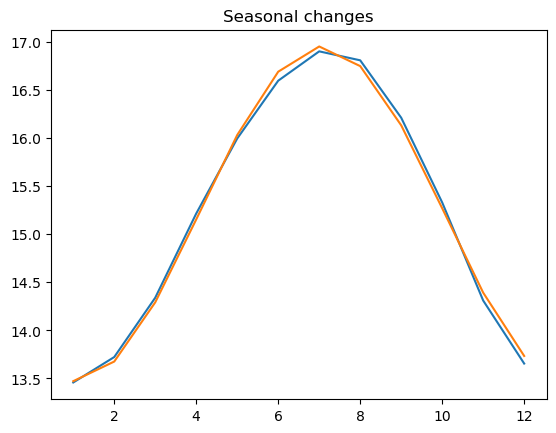

In [17]:
# And we can now overplot the data and the fit

plt.plot(mm.index, mm.temperature)
plt.plot(mm.index, func(mm.index, *popt))
plt.title('Seasonal changes')